# House Sales in King County, USA



#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df= pd.read_csv('../data/kc_house_data.csv')

# Data Analysis

Let see if you have any missing Data

In [14]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
df.isnull().head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()
#no missing value

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Lets take some Satistical information

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


It's little hard to read this table so lets describe through visualiztion using seaborn and matplotlib


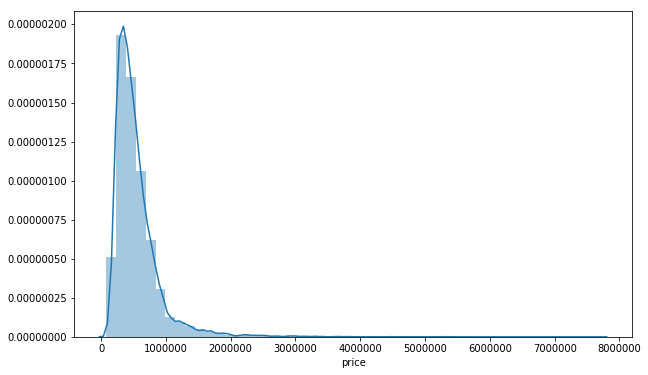

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

So notice here it looks like most of our houses are falling somewhere between zero and maybe around
1.5 million dollars and we could have these extreme outliers here for the really expensive
houses and it may actually make sense to drop those outliers in our analysis if they are just a few
points that are very extreme.And so we can essentially build a model that realistically predicts the price of a house if its intended value in somewhere between let's say 0 and 2 million dollars.There's not going to be that many houses apparently on the market that are worth more than let's say 3 million.So that's something to keep in mind here especially for applying this to a realistic situation.They were trying to build a model for a real estate agency since it's really not that many houses on the market that are that expensive.It may not be really useful to actually have our model train on these extreme outliers.

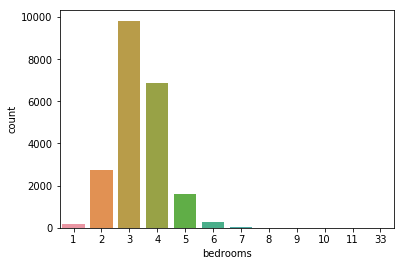

In [22]:
sns.countplot(df['bedrooms'])

Mostly Houses that contains 2 to 5 bedrooms 

In [25]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

sqft_living has a very high correlation with the actual price of the house.And now we are going to do is exploring highly correlated features with your label through a scatter plot.

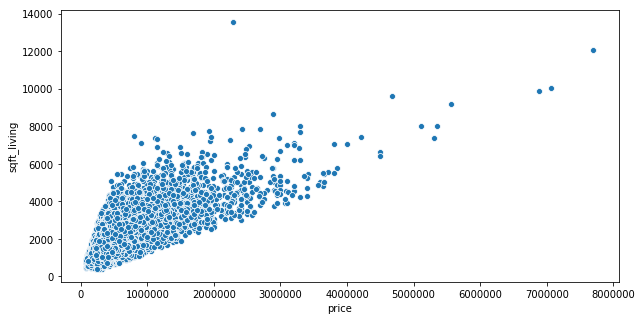

In [27]:
plt.figure(figsize=(10,5))

sns.scatterplot(x='price',y='sqft_living',data=df)

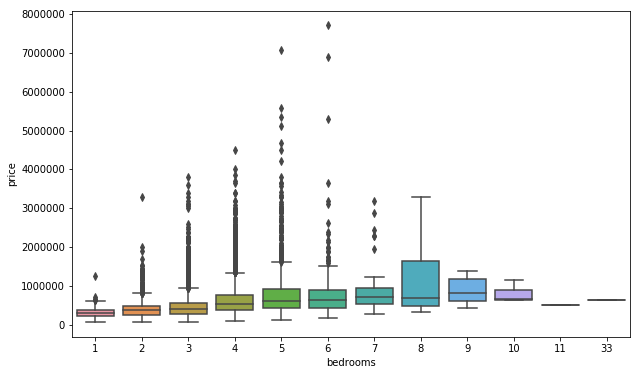

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df)


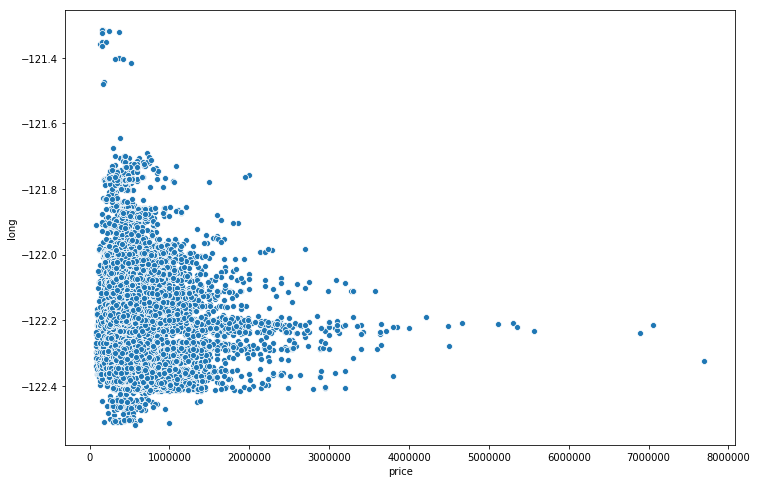

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

It looks like there tends to be some sort of price distribution at a certain longitude.So looks like at longitude -122.2.That looks like an expensive housing area.You can see the distribution quite clearly here.

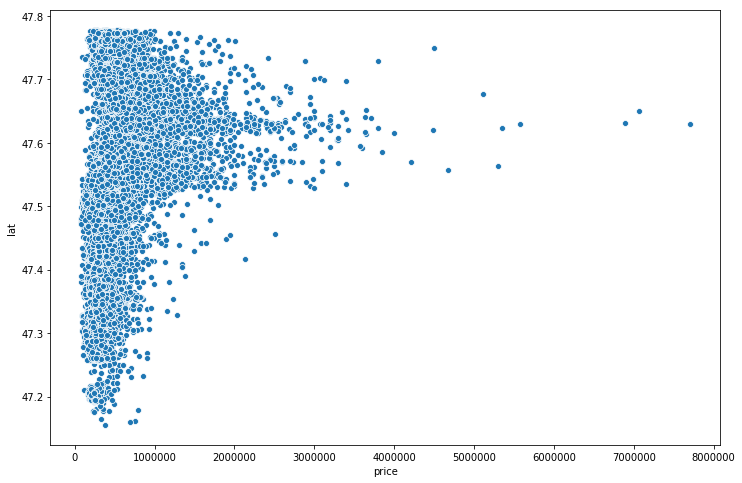

In [30]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

if you see that many houses has higher prices for lat between 47.6 to 47.7

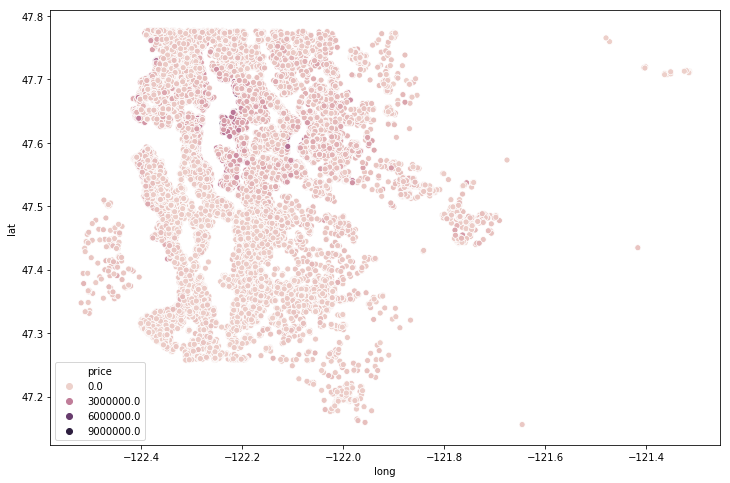

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')


now we gonna clean this map a little bit and also remove outliers that are in between 47.6 to 47.7 at lat and -122.2 at long

In [34]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


So now in my top 20 houses my most expensive house in this dataset is 7.7 milliondollars.And as I keep going down you'll notice that it eventually kind of quickly drops off to something more reasonable like 3.6M.And if we take a look at our distribution of the prices of these houses it looks like I should probablyhave some reasonable cutoff at three million dollars because it looks like almost just that there'sonly 20 houses here that are above three million or maybe a little bit more than that.
So something I can do is I can just sample out the maybe top one percent of all houses.

In [35]:
len(df)

21597

around 21597 houses in my dataframe 


In [37]:
len(df)*0.01 #1%

215.97

In [40]:
#Drop expensive Houses 
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

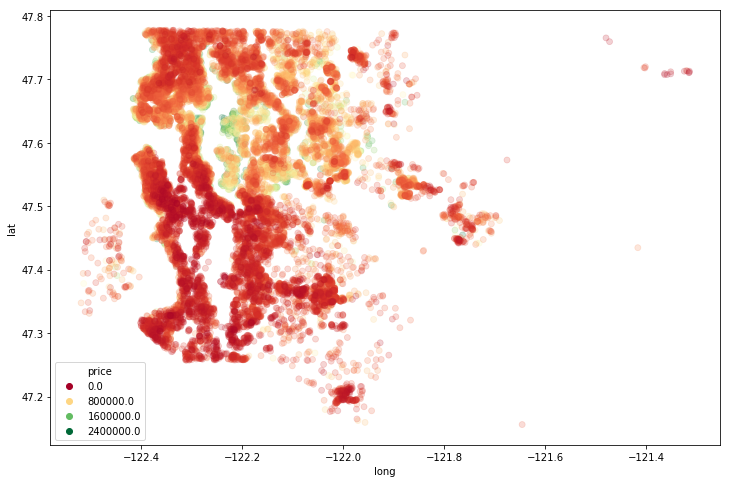

In [42]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')


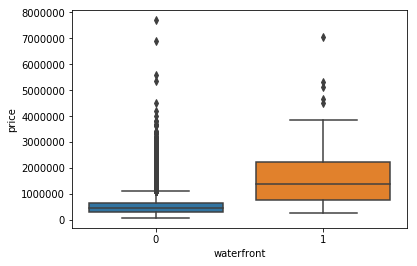

In [44]:
#Houses that are near to the waterfront are more expensive
sns.boxplot(x='waterfront',y='price',data=df)

# Feature Engineering process

In [45]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We gonna drop Id coloumn 

In [47]:
df=df.drop('id',axis=1)

In [53]:
df['date']=pd.to_datetime(df['date'])

In [56]:
df['date'].head(5)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [57]:
df['year']  = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [58]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


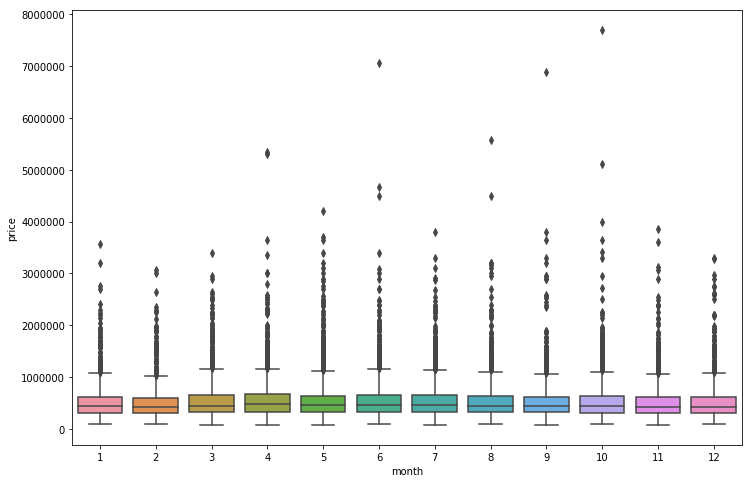

In [59]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month',y='price',data=df)

In [61]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

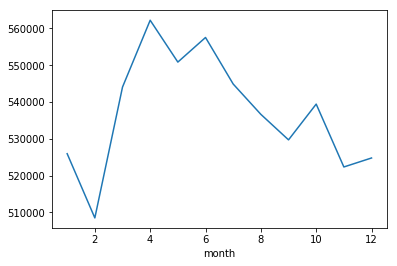

In [62]:
df.groupby('month').mean()['price'].plot()

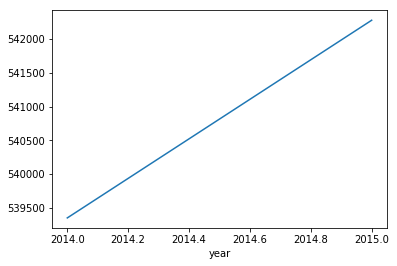

In [63]:
df.groupby('year').mean()['price'].plot()

In [64]:
df= df.drop('date',axis=1)

In [65]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [66]:
df=df.drop('zipcode',axis=1)

In [69]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [70]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

# Data Preprocessing and Creating a Model

In [71]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [78]:
X_train = scaler.fit_transform(X_train)

In [79]:
X_test = scaler.transform(X_test)

# Now create the Model

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [84]:
X_train.shape

(15117, 19)

19 features

In [85]:
model = Sequential()

model.add(Dense(19,activation='relu'))
0model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

Instructions for updating:
Colocations handled automatically by placer.


In [86]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Instructions for updating:
Use tf.cast instead.
Train on 15117 samples, validate on 6480 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/400
15117/15117 [==============================] - 6s 393us/sample - loss: 430240353252.4305 - val_loss: 418908660055.8618
Epoch 2/400
15117/15117 [==============================] - 2s 108us/sample - loss: 428700998355.0388 - val_loss: 413391210187.5358
Epoch 3/400
15117/15117 [==============================] - 1s 47us/sample - loss: 405785201997.3402 - val_loss: 360770299656.2172
Epoch 4/400
15117/15117 [==============================] - 1s 55us/sample - loss: 298515642505.2378 - val_loss: 200382516469.2543
Epoch 5/400
15117/15117 [==============================] - 1s 90us/sample - loss: 140045489665.1177 - val_loss: 98688151865.5210
Epoch 6/400
15117/15117 [==============================] - 1s 53us/sample - loss: 99243115027.0683 - val_loss: 94766449449.0864
Epoch 7/400
15117/15117 [==============================] - 1s 93us/sample - 

15117/15117 [==============================] - 3s 204us/sample - loss: 39412888311.3464 - val_loss: 38200903973.2938
Epoch 60/400
15117/15117 [==============================] - 1s 42us/sample - loss: 39128115401.3183 - val_loss: 37898158894.1432
Epoch 61/400
15117/15117 [==============================] - 1s 53us/sample - loss: 38871741157.0571 - val_loss: 37668584865.1852
Epoch 62/400
15117/15117 [==============================] - 3s 189us/sample - loss: 38658895996.9094 - val_loss: 37411527803.8914
Epoch 63/400
15117/15117 [==============================] - 2s 129us/sample - loss: 38388781284.4136 - val_loss: 37156747147.6938
Epoch 64/400
15117/15117 [==============================] - 1s 65us/sample - loss: 38161437537.8988 - val_loss: 36928795984.2765
Epoch 65/400
15117/15117 [==============================] - 1s 68us/sample - loss: 37957293157.8107 - val_loss: 36740329922.0543
Epoch 66/400
15117/15117 [==============================] - 1s 42us/sample - loss: 37713078612.5882 - val_l

15117/15117 [==============================] - 0s 29us/sample - loss: 32932744766.7595 - val_loss: 31516617417.0074
Epoch 123/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32889665673.5088 - val_loss: 31430214542.2222
Epoch 124/400
15117/15117 [==============================] - 0s 29us/sample - loss: 32880429442.1084 - val_loss: 31444749223.5062
Epoch 125/400
15117/15117 [==============================] - 0s 26us/sample - loss: 32827234557.5445 - val_loss: 31363187249.3037
Epoch 126/400
15117/15117 [==============================] - 1s 58us/sample - loss: 32798727952.2741 - val_loss: 31303177810.1728
Epoch 127/400
15117/15117 [==============================] - 2s 124us/sample - loss: 32789866008.6229 - val_loss: 31271616977.2247
Epoch 128/400
15117/15117 [==============================] - 1s 37us/sample - loss: 32747139168.6287 - val_loss: 31217846211.3185
Epoch 129/400
15117/15117 [==============================] - 0s 27us/sample - loss: 32725268132.7734 - 

15117/15117 [==============================] - 1s 46us/sample - loss: 31433119375.0972 - val_loss: 29640869357.0370
Epoch 186/400
15117/15117 [==============================] - 1s 37us/sample - loss: 31411664852.5120 - val_loss: 29614718257.9358
Epoch 187/400
15117/15117 [==============================] - 0s 28us/sample - loss: 31410816372.7639 - val_loss: 29569219864.6519
Epoch 188/400
15117/15117 [==============================] - 0s 29us/sample - loss: 31406835381.7080 - val_loss: 29586109515.8519
Epoch 189/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31442014918.1684 - val_loss: 29542417142.5185
Epoch 190/400
15117/15117 [==============================] - 1s 44us/sample - loss: 31384863981.4228 - val_loss: 29535066056.3753
Epoch 191/400
15117/15117 [==============================] - 0s 32us/sample - loss: 31342799471.2602 - val_loss: 29608400258.8444
Epoch 192/400
15117/15117 [==============================] - 0s 26us/sample - loss: 31386501191.5317 - v

15117/15117 [==============================] - 0s 31us/sample - loss: 30579557763.1922 - val_loss: 28546283535.1704
Epoch 249/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30580908703.1512 - val_loss: 28531682968.9679
Epoch 250/400
15117/15117 [==============================] - 1s 37us/sample - loss: 30579419563.9706 - val_loss: 28529723518.4198
Epoch 251/400
15117/15117 [==============================] - 1s 35us/sample - loss: 30561503173.0677 - val_loss: 28505837775.3284
Epoch 252/400
15117/15117 [==============================] - 1s 45us/sample - loss: 30555802209.5093 - val_loss: 28516416013.9062
Epoch 253/400
15117/15117 [==============================] - 1s 37us/sample - loss: 30485450485.6530 - val_loss: 28549632869.7679
Epoch 254/400
15117/15117 [==============================] - 1s 42us/sample - loss: 30492618553.9332 - val_loss: 28454186188.8000
Epoch 255/400
15117/15117 [==============================] - 1s 49us/sample - loss: 30498720304.1958 - v

Epoch 311/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29931864676.0833 - val_loss: 27744958266.7852
Epoch 312/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29976085142.3452 - val_loss: 27729580406.2025
Epoch 313/400
15117/15117 [==============================] - 0s 27us/sample - loss: 29936990846.7045 - val_loss: 27770782970.3111
Epoch 314/400
15117/15117 [==============================] - 1s 36us/sample - loss: 29938042645.7609 - val_loss: 27758797659.6543
Epoch 315/400
15117/15117 [==============================] - 0s 32us/sample - loss: 29921800161.1791 - val_loss: 27712112119.1506
Epoch 316/400
15117/15117 [==============================] - 1s 39us/sample - loss: 29928440813.1010 - val_loss: 27709949598.0247
Epoch 317/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29876097906.6301 - val_loss: 27750671064.1778
Epoch 318/400
15117/15117 [==============================] - 1s 34us/sample - loss: 298830

Epoch 374/400
15117/15117 [==============================] - 1s 79us/sample - loss: 29331109109.1449 - val_loss: 27054886765.3531
Epoch 375/400
15117/15117 [==============================] - 1s 54us/sample - loss: 29331821142.6712 - val_loss: 27018180835.5556
Epoch 376/400
15117/15117 [==============================] - 0s 24us/sample - loss: 29353426316.6755 - val_loss: 27031836484.8988
Epoch 377/400
15117/15117 [==============================] - 0s 25us/sample - loss: 29284394651.9675 - val_loss: 27085077466.0741
Epoch 378/400
15117/15117 [==============================] - 0s 24us/sample - loss: 29358912121.8612 - val_loss: 27075203623.1901
Epoch 379/400
15117/15117 [==============================] - 0s 31us/sample - loss: 29309659913.0939 - val_loss: 26968565507.1605
Epoch 380/400
15117/15117 [==============================] - 1s 54us/sample - loss: 29345628924.6300 - val_loss: 26976978673.4617
Epoch 381/400
15117/15117 [==============================] - 0s 27us/sample - loss: 293280

In [88]:
losses= pd.DataFrame(model.history.history)

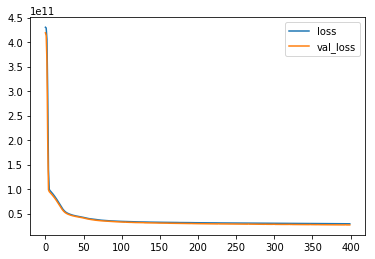

In [90]:
losses.plot()

# Evaluation on Test data

In [92]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [93]:
predictions= model.predict(X_test)

In [94]:
np.sqrt(mean_squared_error(y_test,predictions))

163617.0381832429

In [95]:
mean_absolute_error(y_test,predictions)

100407.24444926697

In [96]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [97]:
5.402966e+05


540296.6

In [98]:
explained_variance_score(y_test,predictions)

0.7984627293456366

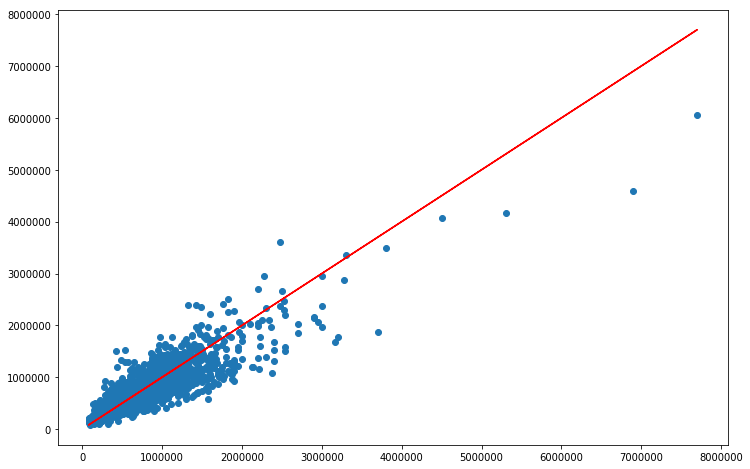

In [101]:
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [111]:
single_house = df.drop('price',axis=1).iloc[0]

In [113]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [114]:
model.predict(single_house)

array([[280675.78]], dtype=float32)

In [115]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
